<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [75]:
import sys
import os
import time
import datetime
import re

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

---

In [90]:
def create_test_data():
    group = np.array(
        [[1.2, 1.1],
        [0.9, 0.7],
        [0, 0],
        [0, 0.3],
        [0.3, 0.2],
        [0.8, 0.6],
        [0.9, 0.8]]
    )
    labels = ["A", "A", "B", "B", "B", "A", "A"]
    
    data_set = pd.DataFrame(group, columns=["x", "y"])
    data_set["label"] = labels
    
    return data_set

$distance=\sqrt{(A_0-B_0)^2 + (A_1-B_1)^2}$

,x,y,label
0,1.2,1.1,A
1,0.9,0.7,A
2,0.0,0.0,B
3,0.0,0.3,B
4,0.3,0.2,B
5,0.8,0.6,A
6,0.9,0.8,A


{'distance_details': {'A': 3, 'B': 1},
 'sorted_distance': [('A', 3), ('B', 1)],
 'predict_label': 'A'}

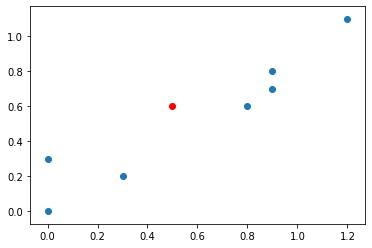

In [91]:
def classify_knn(single_vector, training_df, k):
    import operator
    
    row_cnt = training_df.shape[0]
    pure_data = training_df[["x", "y"]].values
    labels = training_df["label"].to_list()
    
    diff = np.tile(single_vector, (row_cnt, 1)) - pure_data
    diff_sq = diff**2
    distance = (diff_sq.sum(axis=1))**0.5 # d=1
    
    # sorted, in order to choose k nearest labels
    sorted_distance_index = distance.argsort() 
    
    class_count = {} #class_count = {'label': label_cnt}
    for i in range(k):
        vote_label = labels[sorted_distance_index[i]]
        class_count[vote_label] = class_count.get(vote_label, 0) + 1
    
    sorted_class_count = sorted(
        class_count.items(),
        key=operator.itemgetter(1), # use the dict value as key
        reverse=True
    )
    
    results = {
        "distance_details": class_count,
        "sorted_distance": sorted_class_count,
        "predict_label": sorted_class_count[0][0]
    }
    #predict_lable = sorted_class_count[0][0]
    return results
    

#test
training_df = create_test_data()
training_data = training_df[["x", "y"]]
input_vector=[0.5, 0.6]
training_df


results = classify_knn(
    single_vector=input_vector,
    training_df=training_df,
    k=4
)
results

#plt.plot(training_data["x"], training_data["y"], "o")
plt.scatter(training_data["x"], training_data["y"])
plt.plot(input_vector[0], input_vector[1], "o", color="red")